<a href="https://colab.research.google.com/github/ami-ace/ztf_summer_school/blob/main/NMMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imgaug==0.2.6
!pip install nmma
!pip install tensorflow
!git clone https://github.com/nuclear-multimessenger-astronomy/nmma.git
!pip install afterglowpy

fatal: destination path 'nmma' already exists and is not an empty directory.


# GENERATING LIGHTCURVES

## KILONOVAE

In [3]:
import numpy as np

tmin = 0.1
tmax = 20.0
deltat = 0.1
t = np.arange(tmin, tmax, deltat) # in days


params_range = {
  'log10_mej_dyn': -3,
  'log10_mej_wind': -3,
  'KNphi': 15,
  'inclination_EM': 0,
  'luminosity_distance': 40}

In [4]:
import nmma
from nmma.em.model import SVDLightCurveModel

lc_model = nmma.em.model.SVDLightCurveModel(model='Bu2019lm', sample_times = t, interpolation_type='tensorflow', svd_path = 'svdmodels')

Loaded filter ps1__i
Loaded filter uvot__u
Loaded filter 2massj
Loaded filter ztfg
Loaded filter sdssu
Loaded filter 2massh
Loaded filter bessellv
Loaded filter ztfi
Loaded filter bessellb
Loaded filter ps1__y
Loaded filter ps1__r
Loaded filter 2massks
Loaded filter uvot__uvw2
Loaded filter uvot__v
Loaded filter uvot__uvm2
Loaded filter atlasc
Loaded filter ps1__z
Loaded filter ztfr
Loaded filter uvot__white
Loaded filter besselli
Loaded filter bessellr
Loaded filter uvot__b
Loaded filter ps1__g
Loaded filter uvot__uvw1
Loaded filter bessellux
Loaded filter atlaso


In [5]:
lbol, mag = lc_model.generate_lightcurve(t, params_range)

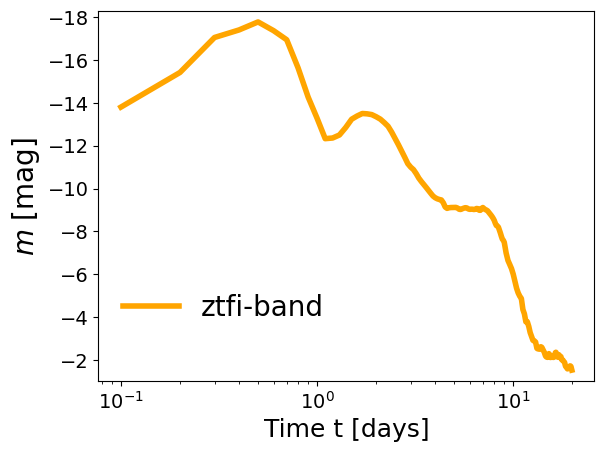

In [9]:
import matplotlib.pyplot as plt

filt = 'ztfi'
plt.semilogx(t, mag['{0}'.format(filt)], label='{0}-band'.format(filt), color='orange', linewidth=4.0)
plt.ylim(np.max(mag['{0}'.format(filt)])+0.5, np.min(mag['{0}'.format(filt)])-0.5)

plt.xlabel('Time t [days]', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('$m$ [mag]', fontsize=20)
plt.yticks(fontsize=14)
plt.legend(prop={"size":20}, frameon=False, bbox_to_anchor=(0., 0.2, 1., .102))

## GRB AFTERGLOW

In [7]:
from nmma.em.model import GRBLightCurveModel

t_day = np.arange(1., 950., 1.)
params = {
  'inclination_EM': 0.1,
  'log10_E0': 50.,
  'thetaCore': 0.05,
  'thetaWing': 0.01,
  'log10_n0':-4.5,
  'p':2.160,
  'log10_epsilon_e':-1.6,
  'log10_epsilon_B':-2.,
  'luminosity_distance': 40,}

grb_model = nmma.em.model.GRBLightCurveModel(t_day, resolution=12, jetType=0)

In [8]:
lbol_grb, mag_grb = grb_model.generate_lightcurve(t_day, params)

In [15]:
mag_grb.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'K', 'U', 'B', 'V', 'R', 'I', 'radio-1.25GHz', 'radio-3GHz', 'radio-5.5GHz', 'radio-6GHz', 'X-ray-1keV', 'X-ray-5keV', 'bessellux', 'bessellb', 'bessellv', 'bessellr', 'besselli', 'standard::u', 'standard::b', 'standard::v', 'standard::r', 'standard::i', 'desu', 'desg', 'desr', 'desi', 'desz', 'desy', 'sdssu', 'sdssg', 'sdssr', 'sdssi', 'sdssz', 'f435w', 'f475w', 'f555w', 'f606w', 'f625w', 'f775w', 'f850lp', 'nicf110w', 'nicf160w', 'f098m', 'f105w', 'f110w', 'f125w', 'f127m', 'f139m', 'f140w', 'f153m', 'f160w', 'f218w', 'f225w', 'f275w', 'f300x', 'f336w', 'f350lp', 'f390w', 'f689m', 'f763m', 'f845m', 'f438w', 'uvf475w', 'uvf555w', 'uvf606w', 'uvf625w', 'uvf775w', 'uvf814w', 'uvf850lp', 'kepler', 'cspb', 'csphs', 'csphd', 'cspjs', 'cspjd', 'cspv3009', 'cspv3014', 'cspv9844', 'cspys', 'cspyd', 'cspg', 'cspi', 'cspk', 'cspr', 'cspu', 'f070w', 'f090w', 'f115w', 'f150w', 'f200w', 'f277w', 'f356w', 'f444w', 'f140m', 'f162m', 'f182m', 'f210m'

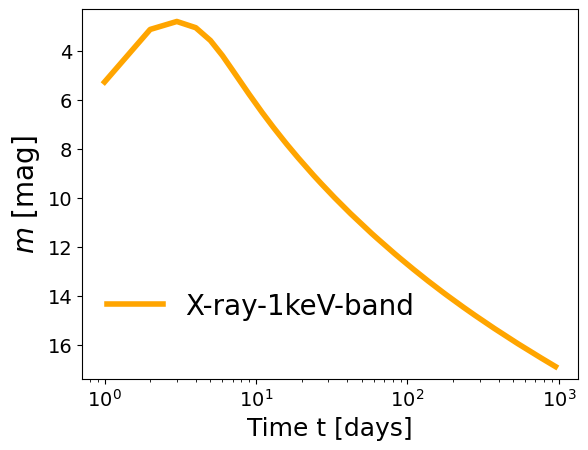

In [17]:
import matplotlib.pyplot as plt

filt = 'X-ray-1keV'
plt.semilogx(t_day, mag_grb['{0}'.format(filt)], label='{0}-band'.format(filt), color='orange', linewidth=4.0)
plt.ylim(np.max(mag_grb['{0}'.format(filt)])+0.5, np.min(mag_grb['{0}'.format(filt)])-0.5)

plt.xlabel('Time t [days]', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('$m$ [mag]', fontsize=20)
plt.yticks(fontsize=14)
plt.legend(prop={"size":20}, frameon=False, bbox_to_anchor=(0., 0.2, 1., .102))

## SUPERNOVA

In [11]:
tSN_min = 1 # days
tSN_max = 30 # days
tSN_dt = 0.1 # deltat
tSN = np.arange(tSN_min, tSN_max, tSN_dt)

params = {
  'supernova_mag_boost': 20,
  'luminosity_distance': 40,}


SN_nugent = nmma.em.model.SupernovaLightCurveModel(tSN, model='nugent-hyper')

lbol_SN_nug, mag_SN_nug = SN_nugent.generate_lightcurve(tSN, params)

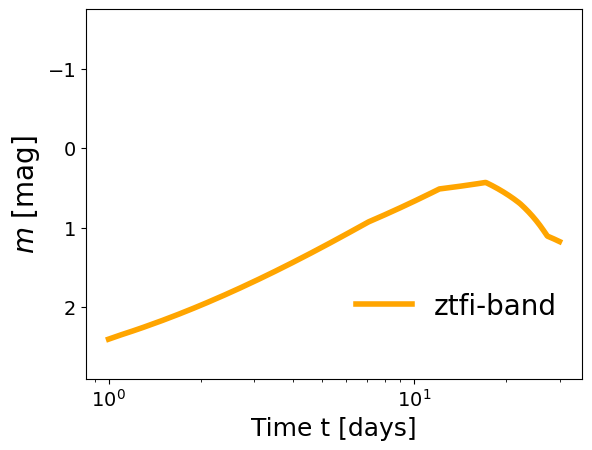

In [13]:
filt = 'ztfi'
plt.semilogx(tSN, mag_SN_nug['{0}'.format(filt)], label='{0}-band'.format(filt), color='orange', linewidth=4.0)
plt.ylim(np.max(mag_SN_nug['{0}'.format(filt)])+0.5, np.min(mag_grb['{0}'.format(filt)])-0.5)

plt.xlabel('Time t [days]', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('$m$ [mag]', fontsize=20)
plt.yticks(fontsize=14)
plt.legend(prop={"size":20}, frameon=False, bbox_to_anchor=(0., 0.2, 1., .102))